In [9]:

%pip install matplotlib
%pip install pandas 
%pip install gym

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.5.3-cp37-cp37m-win_amd64.whl (7.2 MB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\python.exe -m pip install --upgrade pip' command.
ERROR: matplotlib 3.5.3 requires cycler>=0.10, which is not installed.
ERROR: matplotlib 3.5.3 requires fonttools>=4.22.0, which is not installed.
ERROR: matplotlib 3.5.3 requires kiwisolver>=1.0.1, which is not installed.
ERROR: matplotlib 3.5.3 requires numpy>=1.17, which is not installed.
ERROR: matplotlib 3.5.3 requires pillow>=6.2.0, which is not installed.
ERROR: matplotlib 3.5.3 requires pyparsing>=2.2.1, which is not installed.
You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827647 sha256=7d1dd81124babc74e9c326caa24502c563bb6c6be916941912b5290f363e3abf
  Stored in directory: c:\users\gabrielst\appdata\local\pip\cache\wheels\4d\c8\dc\d08577bffa680f083f04448e81e4f176d0e45a13eb16f93c0c
Successfully built gym
Note: you may need to restart the kernel to use updated packages.


Matplotlib is building the font cache; this may take a moment.


In [10]:
env = BlackjackEnv()

In [11]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    for i_episode in range(1, num_episodes + 1):
        # Print out which episode we're on, useful for debugging.
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()

        # Generate an episode.
        # An episode is an array of (state, action, reward) tuples
        episode = []
        state = env.reset()
        for t in range(100):
            action = policy(state)
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            if done:
                break
            state = next_state

        # Find all states the we've visited in this episode
        # We convert each state to a tuple so that we can use it as a dict key
        states_in_episode = set([tuple(x[0]) for x in episode])
        for state in states_in_episode:
            # Find the first occurance of the state in the episode
            first_occurence_idx = next(i for i,x in enumerate(episode) if x[0] == state)
            # Sum up all rewards since the first occurance
            G = sum([x[2]*(discount_factor**i) for i,x in enumerate(episode[first_occurence_idx:])])
            # Calculate average return for this state over all sampled episodes
            returns_sum[state] += G
            returns_count[state] += 1.0
            V[state] = returns_sum[state] / returns_count[state]

    return V    

In [17]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is >= 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 15 else 1

Episode 1000/1000.

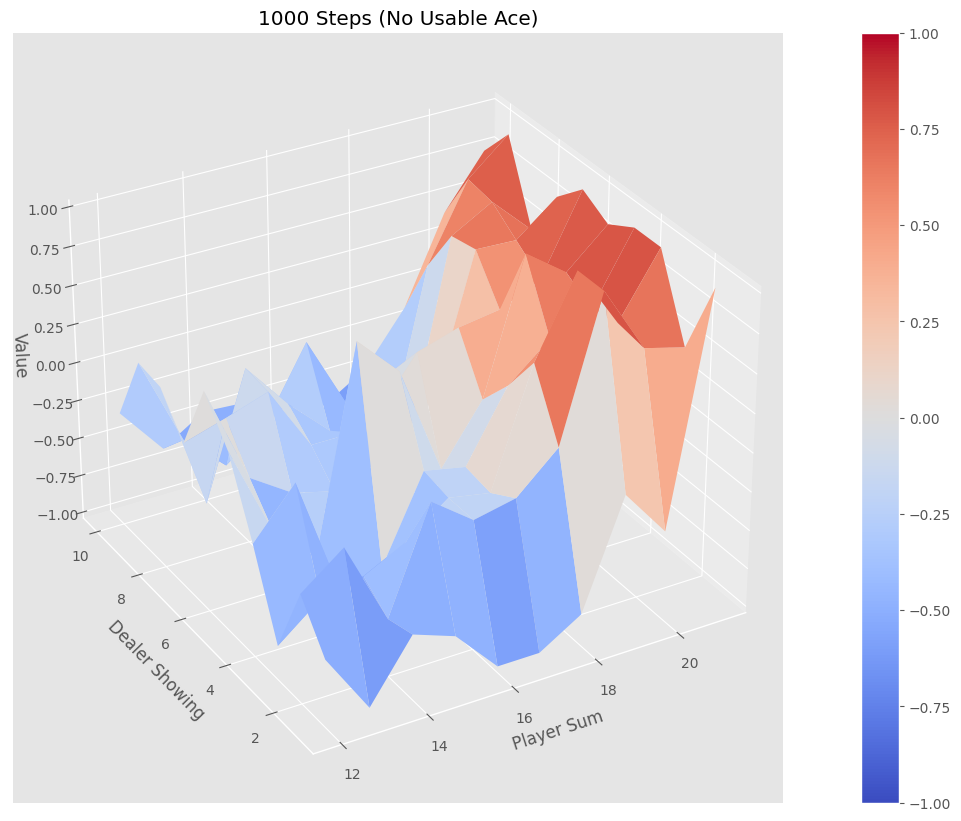

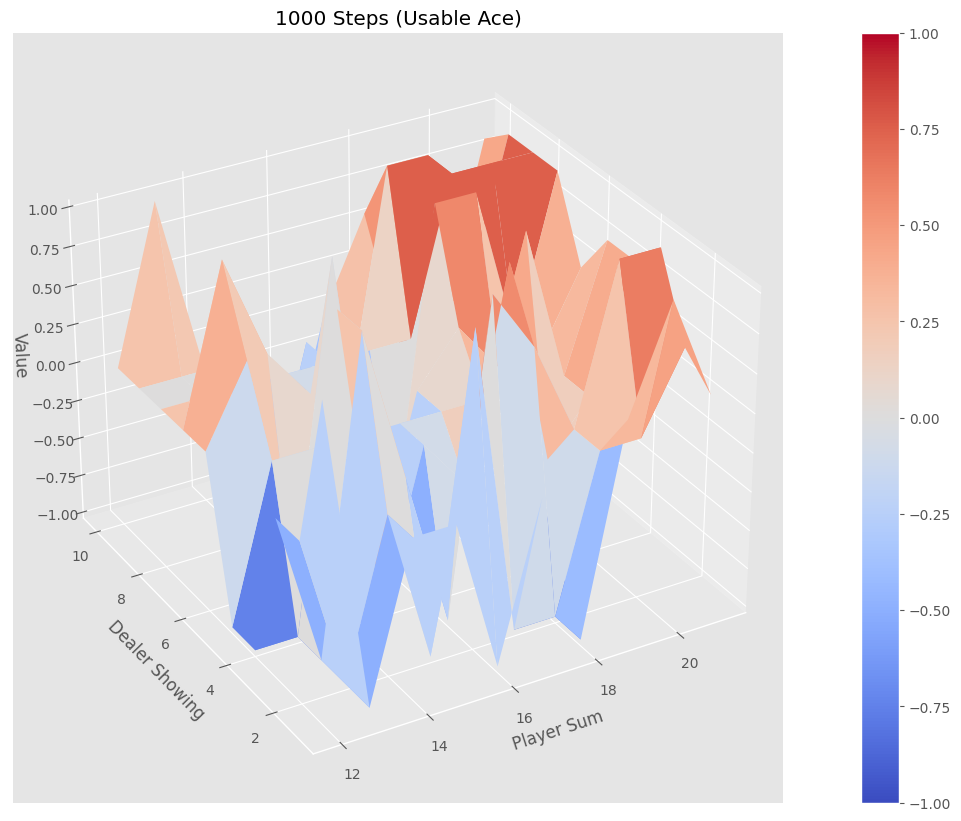

Episode 5000/5000.

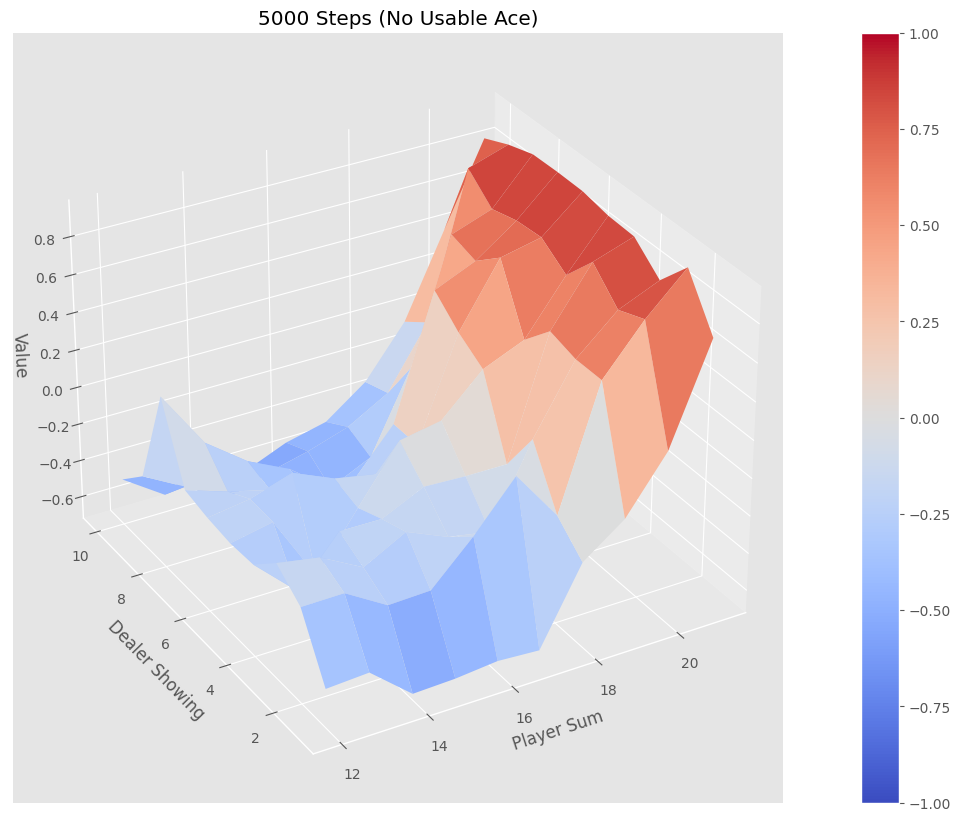

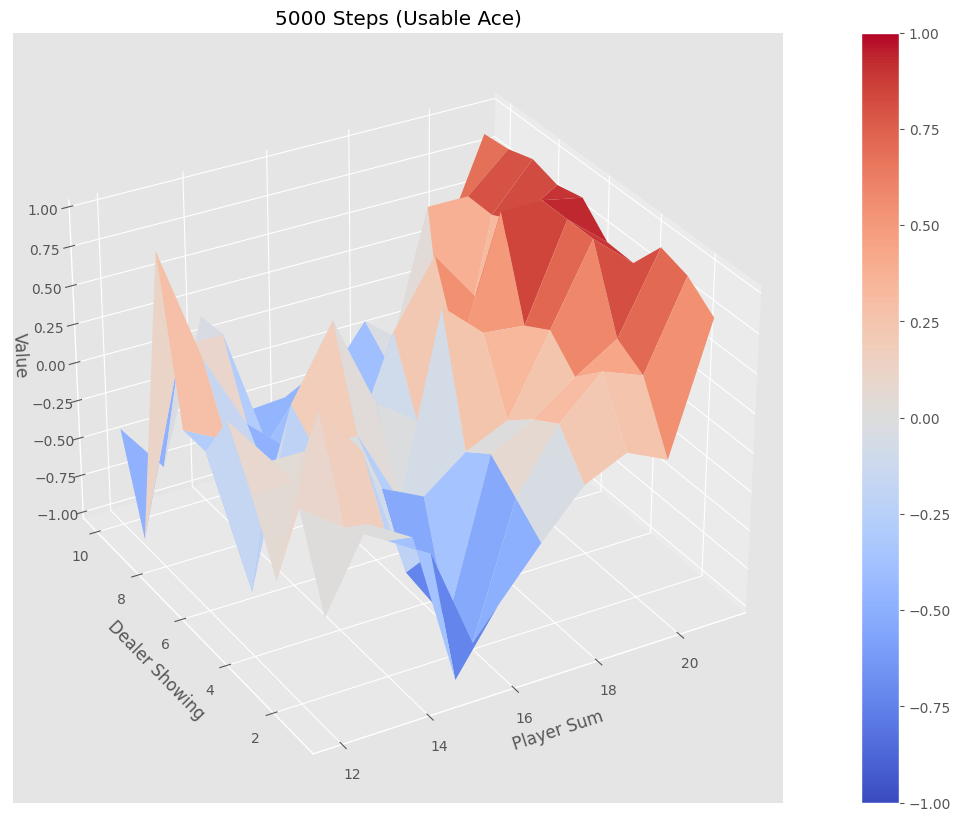

In [18]:
V_10k = mc_prediction(sample_policy, env, num_episodes=1000)
plotting.plot_value_function(V_10k, title="1000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=5000)
plotting.plot_value_function(V_500k, title="5000 Steps")